<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#main-fun-and-plot" data-toc-modified-id="main-fun-and-plot-1">main fun and plot</a></span><ul class="toc-item"><li><span><a href="#inter-plot" data-toc-modified-id="inter-plot-1.1">inter plot</a></span></li></ul></li><li><span><a href="#dashsboard" data-toc-modified-id="dashsboard-2">dashsboard</a></span></li></ul></div>

In [1]:
# modules for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'

# module to save space
import gc

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# main fun and plot

In [2]:
def cost_fun(t,monthly_rate,activation=0,min_sub=0):
    
    '''
    function that compute the costs
    (time unit is month)
    t: time when cost is computed
    
    '''
    if min_sub==0:
        
        return activation + min_sub + monthly_rate * t
    else:
        if t < min_sub:
            return activation + monthly_rate * min_sub
        else:
            return activation + monthly_rate * min_sub + monthly_rate * (t - min_sub)

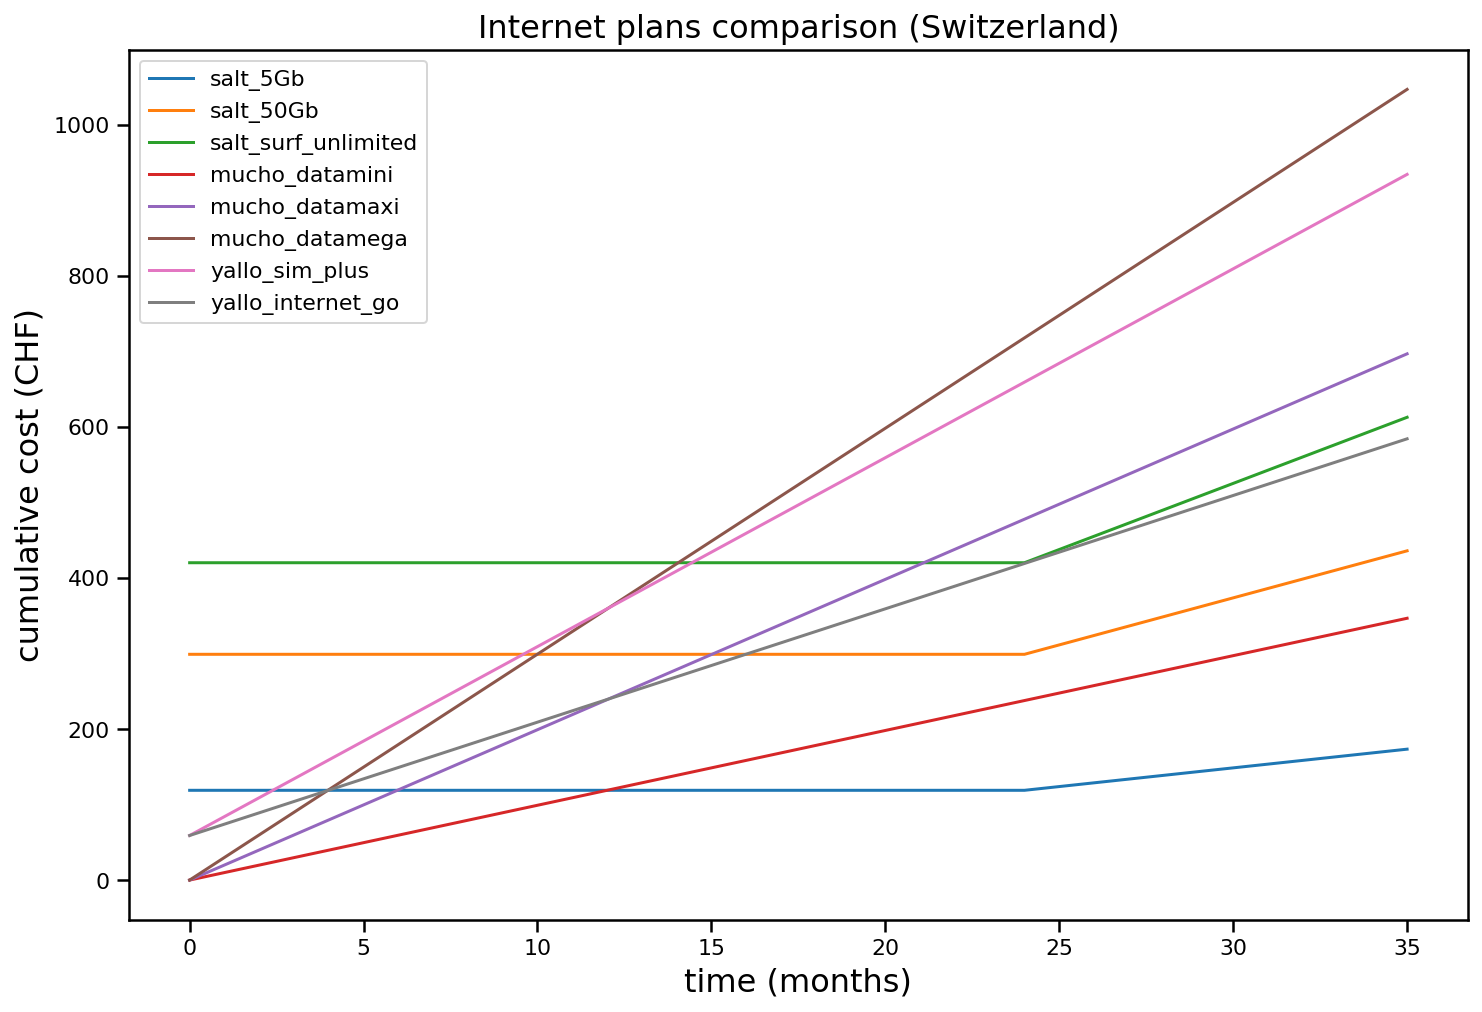

In [3]:
times = list(range(0,36))

plt.figure(figsize=(12,8))

salt_5Gb = [cost_fun(time,monthly_rate=4.95,activation=0,min_sub=24) for time in times]
plt.plot(times,salt_5Gb,label='salt_5Gb')

salt_50Gb = [cost_fun(time,monthly_rate=12.45,activation=0,min_sub=24) for time in times]
plt.plot(times,salt_50Gb,label='salt_50Gb')

salt_surf_unlimited = [cost_fun(time,monthly_rate=17.5,activation=0,min_sub=24) for time in times]
plt.plot(times,salt_surf_unlimited,label='salt_surf_unlimited')

mucho_datamini = [cost_fun(time,monthly_rate=9.9,activation=0,min_sub=0) for time in times]
plt.plot(times,mucho_datamini,label='mucho_datamini')

mucho_datamaxi = [cost_fun(time,monthly_rate=19.9,activation=0,min_sub=0) for time in times]
plt.plot(times,mucho_datamaxi,label='mucho_datamaxi')

mucho_datamega = [cost_fun(time,monthly_rate=29.9,activation=0,min_sub=0) for time in times]
plt.plot(times,mucho_datamega,label='mucho_datamega')

yallo_sim_plus = [cost_fun(time,monthly_rate=25,activation=59,min_sub=0) for time in times]
plt.plot(times,yallo_sim_plus,label='yallo_sim_plus')

yallo_internet_go = [cost_fun(time,monthly_rate=15,activation=59,min_sub=0) for time in times]
plt.plot(times,yallo_internet_go,label='yallo_internet_go')

plt.legend()
plt.title('Internet plans comparison (Switzerland)',size=16)
plt.ylabel('cumulative cost (CHF)',size=16)
plt.xlabel('time (months)',size=16);

some ref from commercial providers:

https://www.yallo.ch/en/internet-go?openchat=120

https://www.salt.ch/en/surf-gb/

https://muchomobile.ch/packs-3.cfm

## inter plot

In [4]:
import plotly.express as px
import plotly.graph_objects as go

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/google/colab/data_table.py:30: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



In [5]:
fig = go.Figure()

fig.add_trace(go.Line(x=times, y=mucho_datamini, name='mucho_datamini'))
fig.add_trace(go.Line(x=times, y=mucho_datamega, name='mucho_datamega'))
fig.add_trace(go.Line(x=times, y=mucho_datamaxi, name='mucho_datamaxi'))
fig.add_trace(go.Line(x=times, y=salt_surf_unlimited, name='salt_surf_unlimited'))
fig.add_trace(go.Line(x=times, y=salt_5Gb, name='salt_5Gb'))
fig.add_trace(go.Line(x=times, y=salt_50Gb, name='salt_50Gb'))
fig.add_trace(go.Line(x=times, y=yallo_internet_go, name='yallo_internet_go'))
fig.add_trace(go.Line(x=times, y=yallo_sim_plus, name='yallo_sim_plus'))

fig.update_layout(title="Internet plans comparison (Switzerland)",
                  xaxis_title="time (months)",
                  yaxis_title="cumulative cost (CHF)")
#                   xaxis_rangeslider_visible=True)
fig.write_html('plotly_inter_comparison.html')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




# dashsboard

https://dash.plotly.com/dash-core-components/input

https://community.plotly.com/t/setting-the-layout-of-a-button-and-input-box/6519